In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
from scipy.stats import ttest_ind
from numba import njit, jit
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
meta = pd.read_csv('../data/META_SL.csv')

In [3]:
meta['plat'].unique()

array(['Agilent', 'Illumina_NGS', 'Affymetrix_U133', 'Illumina_Chip',
       'Affymetrix_HUG', 'Affymetrix_PRV'], dtype=object)

In [4]:
meta

,CN,type,plat,TP
0,C_1,Solid tumor,Agilent,Solid tumor_Agilent
1,C_2,Solid tumor,Agilent,Solid tumor_Agilent
2,C_3,Solid tumor,Agilent,Solid tumor_Agilent
3,C_4,Solid tumor,Agilent,Solid tumor_Agilent
4,C_5,Solid tumor,Agilent,Solid tumor_Agilent
...,...,...,...,...
7162,C_7163,C,Affymetrix_PRV,C_Affymetrix_PRV
7163,C_7164,D,Affymetrix_PRV,D_Affymetrix_PRV
7164,C_7165,D,Affymetrix_PRV,D_Affymetrix_PRV
7165,C_7166,D,Affymetrix_PRV,D_Affymetrix_PRV


#### Данные, на которых нужно проверить гипотезу

In [5]:
data = pd.read_csv('D:/data/10.csv')

In [6]:
data.head()

,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
AASDHPPT,692.726199,862.569816,756.709032,661.769596,647.699586,813.507259,767.657223,807.149695,757.777429,673.374523,...,4.324767e+03,4.280346e+03,3203.885877,3247.214160,3138.911408,3077.219365,3.636768e+03,3.652668e+03,3.539134e+03,3.712105e+03
AASS,93.902819,103.395158,161.717450,106.887331,107.542733,189.818938,318.239309,203.069214,110.592104,76.105985,...,9.331378e+02,8.185069e+02,945.271181,904.079146,916.502897,952.461171,1.744567e+03,1.638456e+03,1.195429e+03,1.781369e+03
AATK,991.072487,1160.532722,936.842479,757.588629,1232.693316,775.626745,1084.628776,1509.552533,1082.881232,1244.885734,...,4.336392e+06,4.408761e+06,214528.048003,232700.434462,215522.048320,233872.626545,1.966590e+06,2.231822e+06,1.721682e+06,1.804910e+06
ABAT,439.203484,394.120058,480.588403,511.361335,360.228820,468.745494,514.505413,539.547366,538.637264,229.029992,...,2.309759e+04,2.223935e+04,6575.122538,6121.304079,7732.274292,7365.104336,1.467776e+04,1.338869e+04,1.674218e+04,1.741620e+04
ABCC4,968.154289,987.044885,1535.458355,1199.642638,1402.060469,1591.141231,1444.080857,1102.068409,1059.436896,508.646546,...,2.577099e+02,3.130285e+02,570.352260,580.782585,794.966657,632.841446,4.134596e+02,6.001053e+02,4.468647e+02,4.331226e+02


In [7]:
data.columns = meta['CN']

In [8]:
data.head()

CN,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
AASDHPPT,692.726199,862.569816,756.709032,661.769596,647.699586,813.507259,767.657223,807.149695,757.777429,673.374523,...,4.324767e+03,4.280346e+03,3203.885877,3247.214160,3138.911408,3077.219365,3.636768e+03,3.652668e+03,3.539134e+03,3.712105e+03
AASS,93.902819,103.395158,161.717450,106.887331,107.542733,189.818938,318.239309,203.069214,110.592104,76.105985,...,9.331378e+02,8.185069e+02,945.271181,904.079146,916.502897,952.461171,1.744567e+03,1.638456e+03,1.195429e+03,1.781369e+03
AATK,991.072487,1160.532722,936.842479,757.588629,1232.693316,775.626745,1084.628776,1509.552533,1082.881232,1244.885734,...,4.336392e+06,4.408761e+06,214528.048003,232700.434462,215522.048320,233872.626545,1.966590e+06,2.231822e+06,1.721682e+06,1.804910e+06
ABAT,439.203484,394.120058,480.588403,511.361335,360.228820,468.745494,514.505413,539.547366,538.637264,229.029992,...,2.309759e+04,2.223935e+04,6575.122538,6121.304079,7732.274292,7365.104336,1.467776e+04,1.338869e+04,1.674218e+04,1.741620e+04
ABCC4,968.154289,987.044885,1535.458355,1199.642638,1402.060469,1591.141231,1444.080857,1102.068409,1059.436896,508.646546,...,2.577099e+02,3.130285e+02,570.352260,580.782585,794.966657,632.841446,4.134596e+02,6.001053e+02,4.468647e+02,4.331226e+02


In [9]:
data = data.astype(float)

In [10]:
data.head()

CN,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
AASDHPPT,692.726199,862.569816,756.709032,661.769596,647.699586,813.507259,767.657223,807.149695,757.777429,673.374523,...,4.324767e+03,4.280346e+03,3203.885877,3247.214160,3138.911408,3077.219365,3.636768e+03,3.652668e+03,3.539134e+03,3.712105e+03
AASS,93.902819,103.395158,161.717450,106.887331,107.542733,189.818938,318.239309,203.069214,110.592104,76.105985,...,9.331378e+02,8.185069e+02,945.271181,904.079146,916.502897,952.461171,1.744567e+03,1.638456e+03,1.195429e+03,1.781369e+03
AATK,991.072487,1160.532722,936.842479,757.588629,1232.693316,775.626745,1084.628776,1509.552533,1082.881232,1244.885734,...,4.336392e+06,4.408761e+06,214528.048003,232700.434462,215522.048320,233872.626545,1.966590e+06,2.231822e+06,1.721682e+06,1.804910e+06
ABAT,439.203484,394.120058,480.588403,511.361335,360.228820,468.745494,514.505413,539.547366,538.637264,229.029992,...,2.309759e+04,2.223935e+04,6575.122538,6121.304079,7732.274292,7365.104336,1.467776e+04,1.338869e+04,1.674218e+04,1.741620e+04
ABCC4,968.154289,987.044885,1535.458355,1199.642638,1402.060469,1591.141231,1444.080857,1102.068409,1059.436896,508.646546,...,2.577099e+02,3.130285e+02,570.352260,580.782585,794.966657,632.841446,4.134596e+02,6.001053e+02,4.468647e+02,4.331226e+02


#### Код Стьюдента

In [11]:
rng = np.random.default_rng()

In [12]:
def get_splitted_columns(columns):
    shuffled = rng.permutation(columns)
    columns_1 = shuffled[:len(columns) // 2]
    columns_2 = shuffled[len(columns) // 2:]
    return columns_1, columns_2

In [13]:
def split_for_f(gene, columns_1, columns_2):
    sample_1 = gene[columns_1].values
    sample_2 = gene[columns_2].values
    return f(sample_1, sample_2)

$$
f_g = sign(\overline{D}_g - \overline{H}_g) \cdot (-lg(P_g))
$$

In [14]:
# @njit
def f(sample_1, sample_2):
    sign = np.sign(sample_1.mean() - sample_2.mean())
    p_value = ttest_ind(sample_1, sample_2)[1]
    return sign * (-np.log1p(p_value))

In [15]:
def calc_corr(data, fixed_cols, splitting_cols):
    cols_1, cols_2 = get_splitted_columns(splitting_cols)
    
    f_1 = data.apply(split_for_f, args=(fixed_cols, cols_1), axis=1)
    f_2 = data.apply(split_for_f, args=(fixed_cols, cols_2), axis=1)
    
    return f_1.corr(f_2)

In [16]:
# %time calc_corr(data, plat_1, plat_2)

#### Перебор всех пар платформ

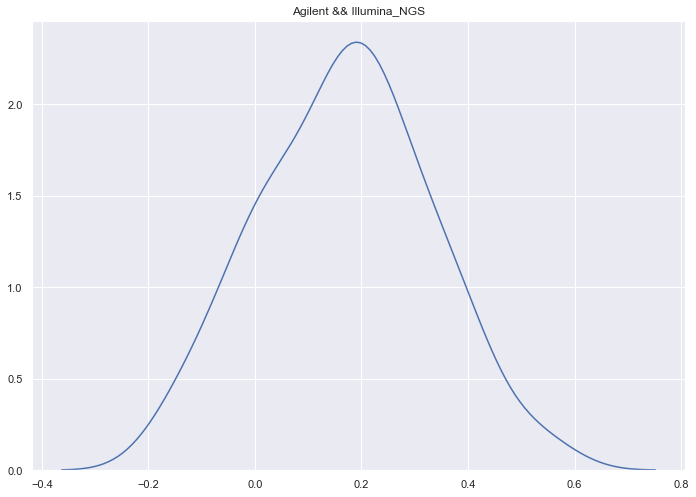

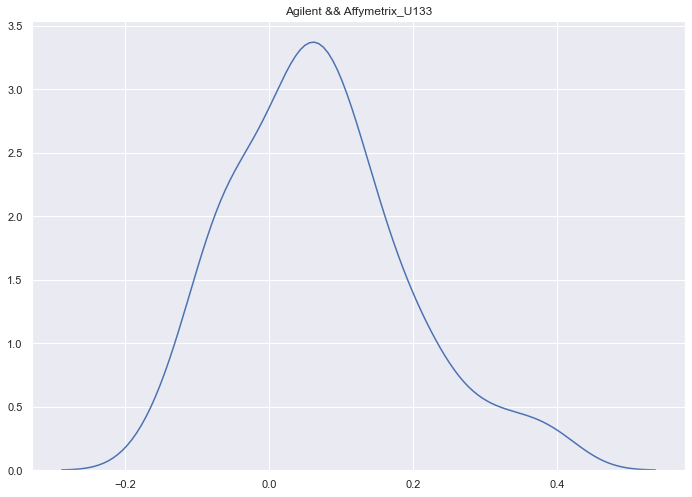

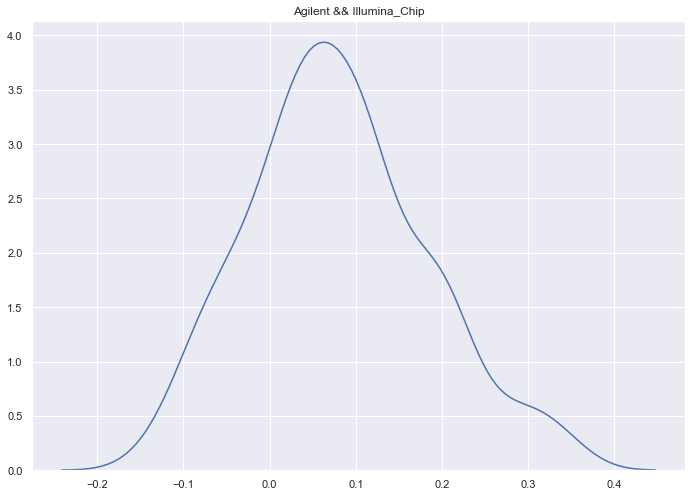

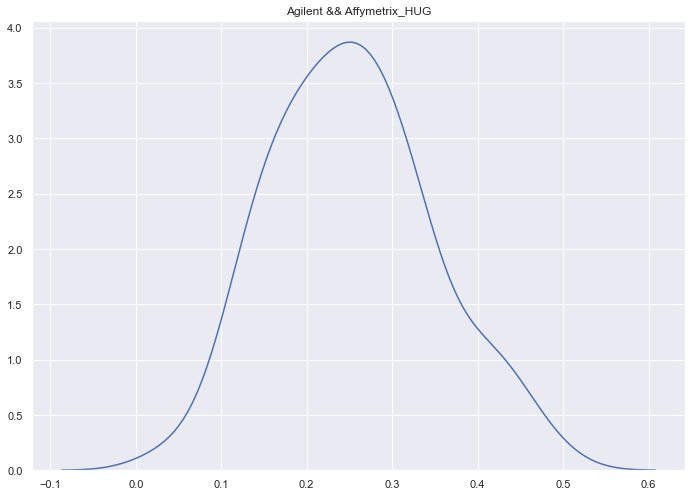

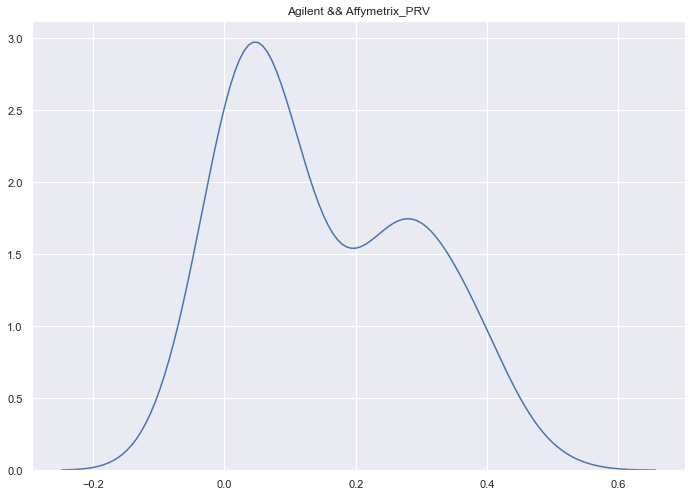

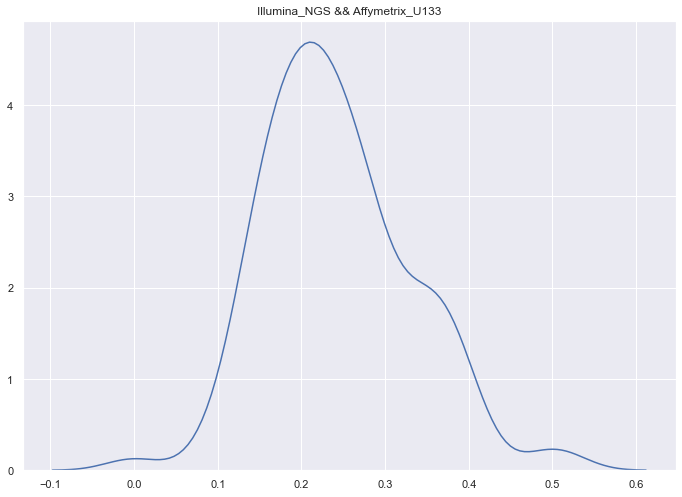

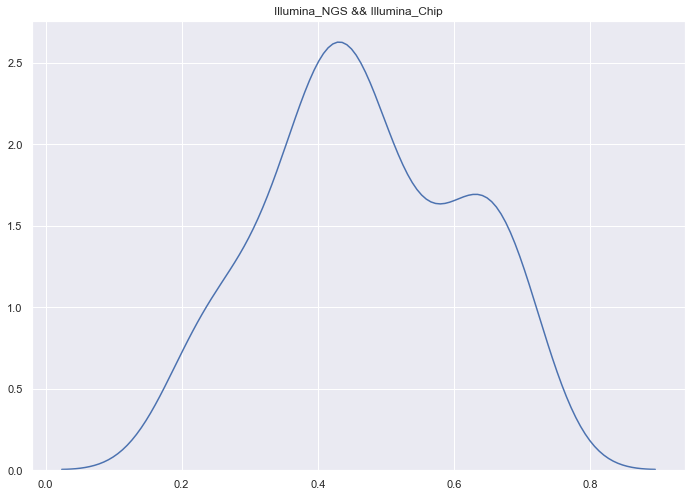

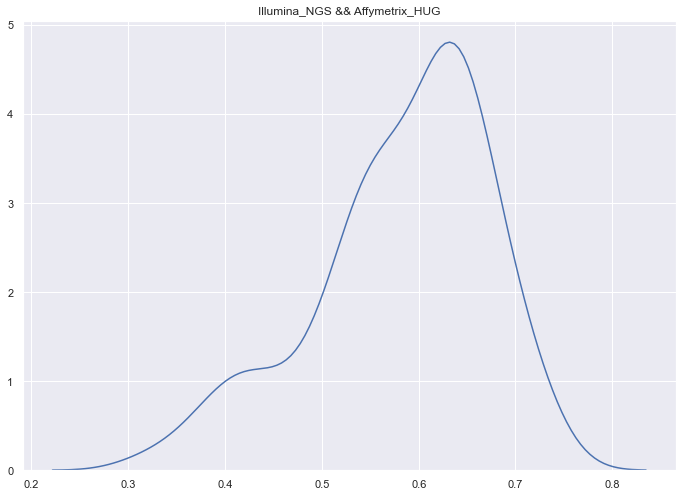

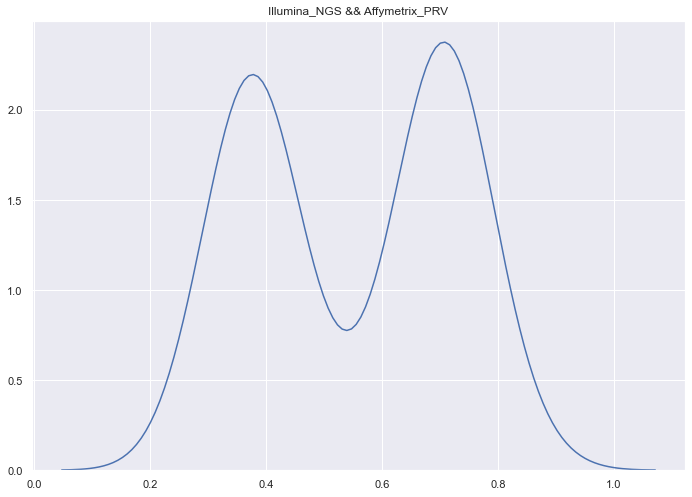

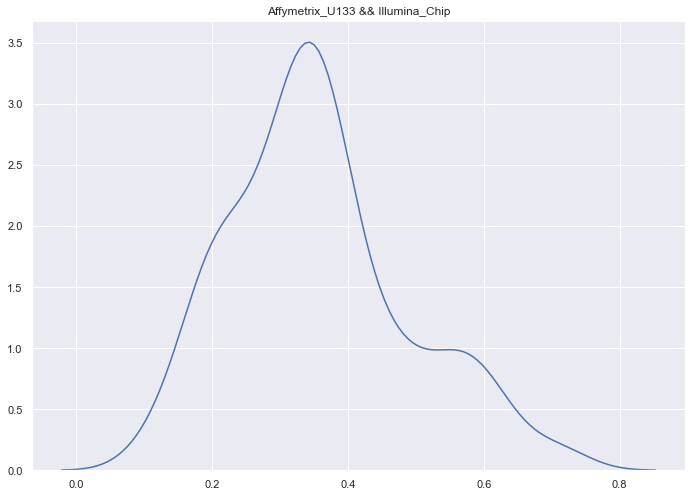

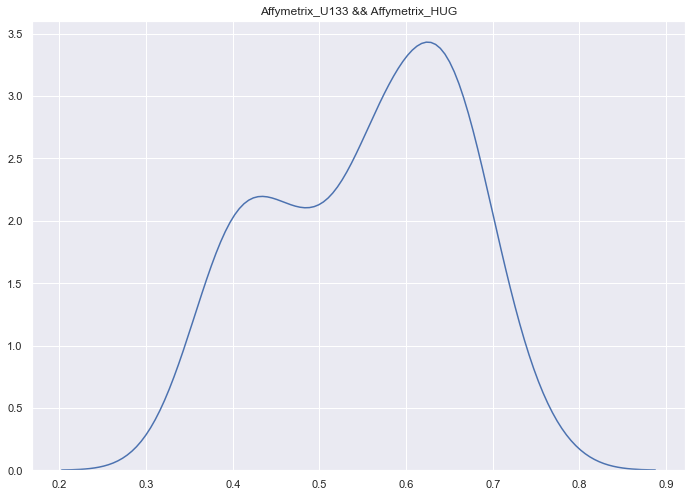

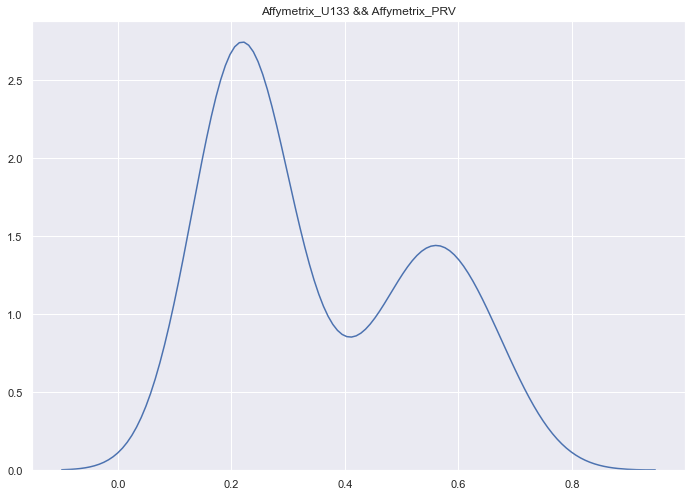

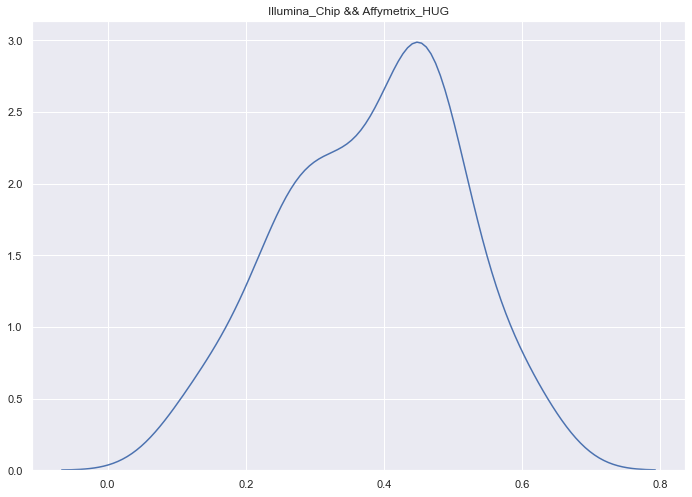

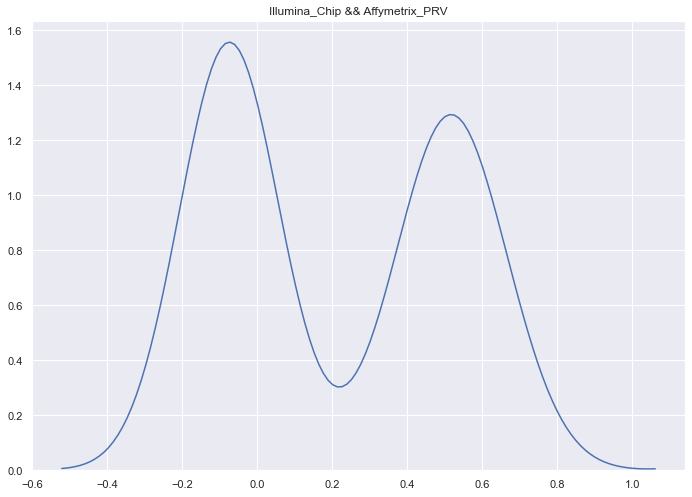

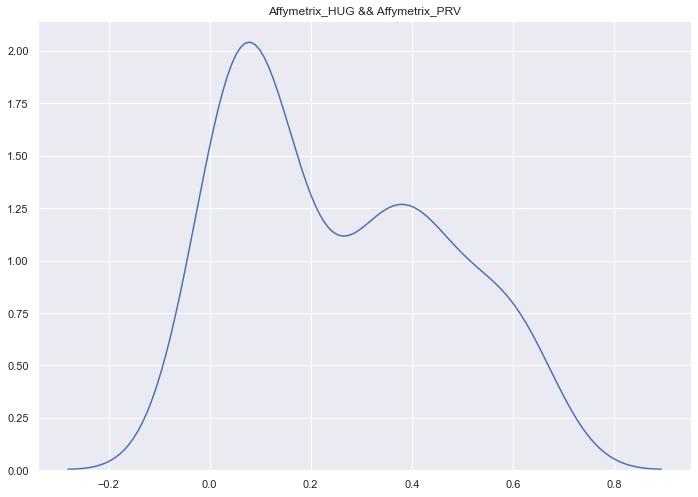

In [17]:
for idx_1, title_1 in enumerate(meta['plat'].unique()):
    for idx_2, title_2 in enumerate(meta['plat'].unique()):
        
        if(idx_2 > idx_1):
            
            plat_1 = meta[meta['plat'] == title_1]['CN']
            plat_2 = meta[meta['plat'] ==  title_2]['CN']
            
            corrs = [calc_corr(data, plat_1, plat_2) for i in range(100)]
            
            plt.figure()
            plt.title(title_1 + " && " + title_2)
            sns.distplot(corrs, hist=False)